In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,2:3] #Glucose
X2 = dataset[:,7:8] #Resistin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,1:2] #BMI
X5 = dataset[:,4:5] #HOMA
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 11ms/step - loss: 0.6983 - acc: 0.5326 - auc_1: 0.5136 - val_loss: 0.6629 - val_acc: 0.6667 - val_auc_1: 0.7321
Epoch 2/700
92/92 [==============================] - 0s 5ms/step - loss: 0.6684 - acc: 0.6196 - auc_1: 0.6600 - val_loss: 0.6124 - val_acc: 0.7083 - val_auc_1: 0.8321
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6410 - acc: 0.6304 - auc_1: 0.7217 - val_loss: 0.5721 - val_acc: 0.7083 - val_auc_1: 0.8393
Epoch 4/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6013 - acc: 0.6848 - auc_1: 0.7633 - val_loss: 0.5562 - val_acc: 0.6667 - val_auc_1: 0.8357
Epoch 5/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5697 - acc: 0.6957 - auc_1: 0.7779 - val_loss: 0.5115 - val_acc: 0.8333 - val_auc_1: 0.8429
Epoch 6/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5520 - acc: 0.7174 - auc_1: 0.7883 - val_loss

92/92 [==============================] - 0s 3ms/step - loss: 0.4868 - acc: 0.7717 - auc_1: 0.8348 - val_loss: 0.5956 - val_acc: 0.6667 - val_auc_1: 0.9071
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4727 - acc: 0.7826 - auc_1: 0.8548 - val_loss: 0.5069 - val_acc: 0.8750 - val_auc_1: 0.9071
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4931 - acc: 0.7500 - auc_1: 0.8393 - val_loss: 0.5497 - val_acc: 0.7917 - val_auc_1: 0.9179
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4823 - acc: 0.7717 - auc_1: 0.8474 - val_loss: 0.6556 - val_acc: 0.6667 - val_auc_1: 0.9071
Epoch 53/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4855 - acc: 0.7500 - auc_1: 0.8417 - val_loss: 0.5798 - val_acc: 0.6667 - val_auc_1: 0.9179
Epoch 54/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4812 - acc: 0.7609 - auc_1: 0.8421 - val_loss: 0.5689 - val_acc: 0.7500 - val_auc_1: 0.9071
Epoch

Epoch 98/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4217 - acc: 0.7935 - auc_1: 0.8869 - val_loss: 0.5824 - val_acc: 0.7500 - val_auc_1: 0.8750
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4171 - acc: 0.8261 - auc_1: 0.8910 - val_loss: 0.5755 - val_acc: 0.7500 - val_auc_1: 0.8821
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4103 - acc: 0.8043 - auc_1: 0.8969 - val_loss: 0.5624 - val_acc: 0.7917 - val_auc_1: 0.8821
Epoch 101/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4136 - acc: 0.8152 - auc_1: 0.8943 - val_loss: 0.5484 - val_acc: 0.8333 - val_auc_1: 0.8964
Epoch 102/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4120 - acc: 0.8261 - auc_1: 0.8898 - val_loss: 0.6377 - val_acc: 0.7083 - val_auc_1: 0.8750
Epoch 103/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3987 - acc: 0.8261 - auc_1: 0.9048 - val_loss: 0.6104 - val_acc: 0.7083 - val_au

92/92 [==============================] - 0s 3ms/step - loss: 0.3392 - acc: 0.8261 - auc_1: 0.9267 - val_loss: 0.5031 - val_acc: 0.9167 - val_auc_1: 0.9036
Epoch 147/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3352 - acc: 0.8587 - auc_1: 0.9300 - val_loss: 0.5919 - val_acc: 0.7500 - val_auc_1: 0.8964
Epoch 148/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3415 - acc: 0.8478 - auc_1: 0.9271 - val_loss: 0.5313 - val_acc: 0.8750 - val_auc_1: 0.9036
Epoch 149/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3402 - acc: 0.8370 - auc_1: 0.9293 - val_loss: 0.4861 - val_acc: 0.9583 - val_auc_1: 0.9107
Epoch 150/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3496 - acc: 0.8370 - auc_1: 0.9224 - val_loss: 0.5177 - val_acc: 0.9167 - val_auc_1: 0.9036
Epoch 151/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3395 - acc: 0.8370 - auc_1: 0.9302 - val_loss: 0.5762 - val_acc: 0.8333 - val_auc_1: 0.8964


92/92 [==============================] - 0s 3ms/step - loss: 0.2894 - acc: 0.8804 - auc_1: 0.9486 - val_loss: 0.5759 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2829 - acc: 0.8804 - auc_1: 0.9540 - val_loss: 0.5386 - val_acc: 0.8750 - val_auc_1: 0.9107
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2798 - acc: 0.8696 - auc_1: 0.9545 - val_loss: 0.5892 - val_acc: 0.8333 - val_auc_1: 0.9036
Epoch 197/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2998 - acc: 0.8804 - auc_1: 0.9433 - val_loss: 0.5344 - val_acc: 0.9167 - val_auc_1: 0.9036
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2803 - acc: 0.8913 - auc_1: 0.9529 - val_loss: 0.5418 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 199/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2679 - acc: 0.9130 - auc_1: 0.9588 - val_loss: 0.6367 - val_acc: 0.7500 - val_auc_1: 0.8964


92/92 [==============================] - 0s 4ms/step - loss: 0.2526 - acc: 0.8913 - auc_1: 0.9602 - val_loss: 0.6340 - val_acc: 0.8333 - val_auc_1: 0.8536
Epoch 243/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2540 - acc: 0.8804 - auc_1: 0.9593 - val_loss: 0.5949 - val_acc: 0.8750 - val_auc_1: 0.8821
Epoch 244/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2407 - acc: 0.8913 - auc_1: 0.9648 - val_loss: 0.6047 - val_acc: 0.8750 - val_auc_1: 0.8786
Epoch 245/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2423 - acc: 0.8913 - auc_1: 0.9648 - val_loss: 0.6196 - val_acc: 0.8333 - val_auc_1: 0.8679
Epoch 246/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2429 - acc: 0.8804 - auc_1: 0.9624 - val_loss: 0.6858 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 247/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2529 - acc: 0.8913 - auc_1: 0.9605 - val_loss: 0.6616 - val_acc: 0.8333 - val_auc_1: 0.8679


92/92 [==============================] - 0s 3ms/step - loss: 0.2153 - acc: 0.9022 - auc_1: 0.9748 - val_loss: 0.7827 - val_acc: 0.7083 - val_auc_1: 0.8500
Epoch 291/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2091 - acc: 0.8913 - auc_1: 0.9731 - val_loss: 0.7116 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 292/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2087 - acc: 0.8913 - auc_1: 0.9743 - val_loss: 0.6756 - val_acc: 0.8333 - val_auc_1: 0.8500
Epoch 293/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2070 - acc: 0.8804 - auc_1: 0.9745 - val_loss: 0.7958 - val_acc: 0.6667 - val_auc_1: 0.8500
Epoch 294/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2199 - acc: 0.8913 - auc_1: 0.9710 - val_loss: 0.6702 - val_acc: 0.8333 - val_auc_1: 0.8571
Epoch 295/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2096 - acc: 0.9130 - auc_1: 0.9736 - val_loss: 0.6479 - val_acc: 0.8333 - val_auc_1: 0.8571


92/92 [==============================] - 0s 3ms/step - loss: 0.1787 - acc: 0.9239 - auc_1: 0.9810 - val_loss: 0.8235 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 339/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1788 - acc: 0.8804 - auc_1: 0.9805 - val_loss: 0.7493 - val_acc: 0.7917 - val_auc_1: 0.8321
Epoch 340/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1749 - acc: 0.8913 - auc_1: 0.9795 - val_loss: 0.8257 - val_acc: 0.7083 - val_auc_1: 0.8464
Epoch 341/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1689 - acc: 0.9022 - auc_1: 0.9833 - val_loss: 0.8131 - val_acc: 0.7083 - val_auc_1: 0.8500
Epoch 342/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1748 - acc: 0.9022 - auc_1: 0.9790 - val_loss: 0.8506 - val_acc: 0.7500 - val_auc_1: 0.8250
Epoch 343/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1809 - acc: 0.8804 - auc_1: 0.9774 - val_loss: 0.7977 - val_acc: 0.7500 - val_auc_1: 0.8464


92/92 [==============================] - 0s 3ms/step - loss: 0.1640 - acc: 0.9130 - auc_1: 0.9798 - val_loss: 0.9083 - val_acc: 0.7500 - val_auc_1: 0.8214
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1445 - acc: 0.9239 - auc_1: 0.9888 - val_loss: 0.8109 - val_acc: 0.7500 - val_auc_1: 0.8393
Epoch 388/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1552 - acc: 0.8913 - auc_1: 0.9819 - val_loss: 0.8078 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1477 - acc: 0.9022 - auc_1: 0.9862 - val_loss: 0.7893 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1410 - acc: 0.9239 - auc_1: 0.9883 - val_loss: 0.8947 - val_acc: 0.7500 - val_auc_1: 0.8286
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1703 - acc: 0.9239 - auc_1: 0.9833 - val_loss: 0.8904 - val_acc: 0.7083 - val_auc_1: 0.8429


92/92 [==============================] - 0s 3ms/step - loss: 0.1212 - acc: 0.9565 - auc_1: 0.9924 - val_loss: 0.8984 - val_acc: 0.7917 - val_auc_1: 0.8179
Epoch 435/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1226 - acc: 0.9457 - auc_1: 0.9919 - val_loss: 0.8133 - val_acc: 0.7917 - val_auc_1: 0.8286
Epoch 436/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1249 - acc: 0.9565 - auc_1: 0.9898 - val_loss: 0.8286 - val_acc: 0.7917 - val_auc_1: 0.8286
Epoch 437/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1219 - acc: 0.9348 - auc_1: 0.9926 - val_loss: 0.9019 - val_acc: 0.7917 - val_auc_1: 0.8214
Epoch 438/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1338 - acc: 0.9348 - auc_1: 0.9862 - val_loss: 0.8905 - val_acc: 0.7917 - val_auc_1: 0.8214
Epoch 439/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1339 - acc: 0.9348 - auc_1: 0.9905 - val_loss: 0.8222 - val_acc: 0.8333 - val_auc_1: 0.8464


92/92 [==============================] - 0s 3ms/step - loss: 0.1230 - acc: 0.9457 - auc_1: 0.9900 - val_loss: 0.9457 - val_acc: 0.7917 - val_auc_1: 0.8321
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1113 - acc: 0.9565 - auc_1: 0.9948 - val_loss: 0.8183 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1142 - acc: 0.9565 - auc_1: 0.9943 - val_loss: 0.7765 - val_acc: 0.8333 - val_auc_1: 0.8750
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1380 - acc: 0.9348 - auc_1: 0.9871 - val_loss: 0.8804 - val_acc: 0.7917 - val_auc_1: 0.8571
Epoch 486/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1091 - acc: 0.9457 - auc_1: 0.9931 - val_loss: 0.8236 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 487/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0952 - acc: 0.9565 - auc_1: 0.9967 - val_loss: 0.8384 - val_acc: 0.7917 - val_auc_1: 0.8536


92/92 [==============================] - 0s 4ms/step - loss: 0.0790 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 0.8067 - val_acc: 0.7917 - val_auc_1: 0.8750
Epoch 531/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1441 - acc: 0.9457 - auc_1: 0.9867 - val_loss: 0.8714 - val_acc: 0.7500 - val_auc_1: 0.8750
Epoch 532/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0988 - acc: 0.9565 - auc_1: 0.9948 - val_loss: 0.8496 - val_acc: 0.7917 - val_auc_1: 0.8643
Epoch 533/700
92/92 [==============================] - 1s 6ms/step - loss: 0.0787 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 0.8827 - val_acc: 0.7500 - val_auc_1: 0.8571
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0723 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 0.8692 - val_acc: 0.8333 - val_auc_1: 0.8607
Epoch 535/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0982 - acc: 0.9674 - auc_1: 0.9943 - val_loss: 0.7831 - val_acc: 0.8333 - val_auc_1: 0.8750


92/92 [==============================] - 0s 4ms/step - loss: 0.0668 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 0.9791 - val_acc: 0.7500 - val_auc_1: 0.8857
Epoch 579/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0962 - acc: 0.9674 - auc_1: 0.9948 - val_loss: 1.0246 - val_acc: 0.7500 - val_auc_1: 0.8071
Epoch 580/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1272 - acc: 0.9457 - auc_1: 0.9921 - val_loss: 0.9397 - val_acc: 0.7917 - val_auc_1: 0.8821
Epoch 581/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0684 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 0.9204 - val_acc: 0.7917 - val_auc_1: 0.8821
Epoch 582/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1007 - acc: 0.9565 - auc_1: 0.9948 - val_loss: 0.9071 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 583/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0989 - acc: 0.9565 - auc_1: 0.9943 - val_loss: 0.9428 - val_acc: 0.7917 - val_auc_1: 0.8821


92/92 [==============================] - 0s 3ms/step - loss: 0.0659 - acc: 0.9674 - auc_1: 0.9976 - val_loss: 0.9848 - val_acc: 0.7917 - val_auc_1: 0.8857
Epoch 627/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0641 - acc: 0.9565 - auc_1: 0.9981 - val_loss: 1.0396 - val_acc: 0.7917 - val_auc_1: 0.8857
Epoch 628/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0670 - acc: 0.9565 - auc_1: 0.9976 - val_loss: 1.1444 - val_acc: 0.7500 - val_auc_1: 0.8571
Epoch 629/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0671 - acc: 0.9674 - auc_1: 0.9974 - val_loss: 1.1122 - val_acc: 0.7917 - val_auc_1: 0.8357
Epoch 630/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0767 - acc: 0.9565 - auc_1: 0.9969 - val_loss: 1.0299 - val_acc: 0.7500 - val_auc_1: 0.8857
Epoch 631/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0550 - acc: 0.9674 - auc_1: 0.9990 - val_loss: 1.0356 - val_acc: 0.7917 - val_auc_1: 0.8857


92/92 [==============================] - 0s 5ms/step - loss: 0.0864 - acc: 0.9674 - auc_1: 0.9945 - val_loss: 1.3190 - val_acc: 0.7917 - val_auc_1: 0.7929
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0603 - acc: 0.9565 - auc_1: 0.9986 - val_loss: 1.2985 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 676/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0413 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.2620 - val_acc: 0.7917 - val_auc_1: 0.7821
Epoch 677/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0420 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1379 - val_acc: 0.7917 - val_auc_1: 0.8571
Epoch 678/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0459 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.2088 - val_acc: 0.7917 - val_auc_1: 0.8679
Epoch 679/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0471 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 1.4320 - val_acc: 0.7917 - val_auc_1: 0.7750


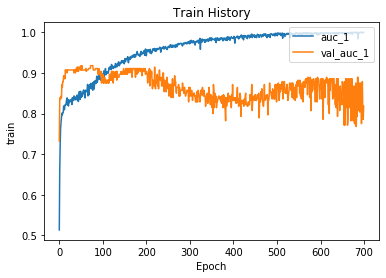

[array([[-0.5258158 ,  0.7512111 , -1.6176167 , -1.2120553 , -0.43434674,
         1.7929729 , -1.3028594 , -0.53494656, -0.93162704],
       [ 0.00486184,  2.264636  , -1.666974  , -0.35257047, -0.31253713,
         2.419005  ,  0.7649636 , -3.3618329 , -2.06478   ],
       [-0.12173834,  0.53659   ,  1.4628364 , -0.3293292 , -0.8125591 ,
        -0.86116683,  0.8001096 , -0.38993713, -0.9389843 ],
       [-0.02106684,  0.27245805, -0.4095522 ,  0.9461973 , -1.0870667 ,
         0.17185646,  0.6918251 ,  0.19359648,  0.667095  ],
       [-4.0050564 ,  0.3285139 ,  0.30702436, -1.9746796 , -0.8437208 ,
        -0.7576544 ,  0.5725485 ,  0.36492938, -0.26690194]],
      dtype=float32), array([ 0.29762268, -1.0011543 ,  0.2023002 ,  0.20757166,  0.6108017 ,
       -0.10912645, -0.4810885 ,  0.51580876,  0.4634142 ], dtype=float32), array([[-4.9334106e-01, -3.4537694e+00,  3.0799047e-03, -2.9132038e-01,
        -2.7020553e-02,  1.2756766e+00,  3.9851182e+00,  2.1080067e+00,
         1.378

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5])
print(predictions)

[[1.2516094e-07]
 [9.9689782e-01]
 [9.3458229e-01]
 [5.4217813e-05]
 [3.1583089e-02]
 [9.9999964e-01]
 [9.9910152e-01]
 [9.9999738e-01]
 [9.5749772e-01]
 [9.8916024e-01]
 [3.3008859e-03]
 [5.2252417e-05]
 [9.9999464e-01]
 [1.0216925e-02]
 [1.3019159e-01]
 [9.9949050e-01]
 [4.5265727e-02]
 [8.2252824e-01]
 [9.9971718e-01]
 [9.9991357e-01]
 [1.3681491e-04]
 [4.8895535e-04]
 [5.7522231e-03]
 [9.8847371e-01]
 [9.9517906e-01]
 [9.9818569e-01]
 [9.7150707e-01]
 [9.9412704e-01]
 [4.8311883e-01]
 [1.0000000e+00]
 [1.4779520e-03]
 [5.3134626e-01]
 [6.5334346e-03]
 [9.4629563e-02]
 [3.3503493e-05]
 [9.9975532e-01]
 [9.9493921e-01]
 [9.6898198e-01]
 [9.7326773e-01]
 [9.9973863e-01]
 [9.8640603e-01]
 [9.9834287e-01]
 [1.3076254e-02]
 [1.6932259e-03]
 [3.8647464e-08]
 [9.5079750e-01]
 [9.7890419e-01]
 [9.9997962e-01]
 [9.9535888e-01]
 [4.4633006e-03]
 [4.6527465e-03]
 [9.9886858e-01]
 [4.6593201e-04]
 [8.9070993e-05]
 [3.9262715e-05]
 [8.1602540e-03]
 [1.1054511e-02]
 [9.9982870e-01]
 [1.1501494e-0